In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_BN_2(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=64, strides=1, 
                      padding='same', input_shape=input_shape)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=64*(2**int((i+1)/4)), 
                          strides=1, padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())
    model.add(BatchNormalization())    
#     model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 14):
    model = build_1d_cnn_custom_BN_2(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 16000, 64)         256       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 1024000)           4096000   
_________________________________________________________________
dense (Dense)                (None, 16)                16384016  
Total params: 20,480,656
Trainable params: 18,432,528
Non-trainable pa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_20 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_21 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_44 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_45 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_65 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_55 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_66 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_56 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_90 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_78 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_91 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_79 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 8000, 64)          0         
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.9671 - acc: 0.4027
Epoch 00001: val_loss improved from inf to 2.39656, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_3_conv_checkpoint/001-2.3966.hdf5
36805/36805 [==============================] - 100s 3ms/sample - loss: 2.9672 - acc: 0.4027 - val_loss: 2.3966 - val_acc: 0.4172
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9507 - acc: 0.7848
Epoch 00002: val_loss did not improve from 2.39656
36805/36805 [==============================] - 95s 3ms/sample - loss: 0.9513 - acc: 0.7848 - val_loss: 3.0202 - val_acc: 0.4135
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4243 - acc: 0.9078
Epoch 00003: val_loss did not improve from 2.39656
36805/36805 [==============================] - 95s 3ms/sample - loss: 0.4244 - acc: 0.9078 - val_loss: 3.0717 - v

36800/36805 [============================>.] - ETA: 0s - loss: 0.1039 - acc: 0.9857
Epoch 00029: val_loss did not improve from 2.39656
36805/36805 [==============================] - 94s 3ms/sample - loss: 0.1042 - acc: 0.9856 - val_loss: 6.1015 - val_acc: 0.4458
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1221 - acc: 0.9821
Epoch 00030: val_loss did not improve from 2.39656
36805/36805 [==============================] - 94s 3ms/sample - loss: 0.1222 - acc: 0.9821 - val_loss: 5.7953 - val_acc: 0.4710
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1073 - acc: 0.9847
Epoch 00031: val_loss did not improve from 2.39656
36805/36805 [==============================] - 94s 3ms/sample - loss: 0.1074 - acc: 0.9847 - val_loss: 5.5863 - val_acc: 0.4962
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1204 - acc: 0.9833
Epoch 00032: val_loss did not improve from 2.39656
36805/36805 [========================

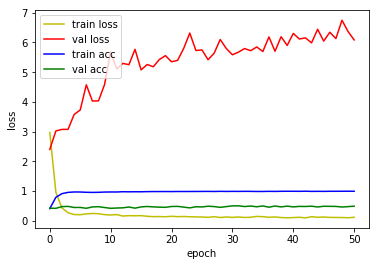

4815/4815 [==============================] - 5s 1ms/sample - loss: 2.5690 - acc: 0.3799
Loss: 2.569016988304669 Accuracy: 0.37985462

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2160 - acc: 0.4475
Epoch 00001: val_loss improved from inf to 1.96821, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_4_conv_checkpoint/001-1.9682.hdf5
36805/36805 [==============================] - 109s 3ms/sample - loss: 2.2161 - acc: 0.4475 - val_loss: 1.9682 - val_acc: 0.4433
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.7471 - acc: 0.7914
Epoch 00002: val_loss improved from 1.96821 to 1.91519, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_4_conv_checkpoint/002-1.9152.hdf5
36805/36805 [==============================] - 103s 3ms/sample - loss: 0.7476 - acc: 0.7913 - val_loss: 1.9152 - val_acc: 0.5355
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9909
Epoch 00029: val_loss did not improve from 1.82711
36805/36805 [==============================] - 102s 3ms/sample - loss: 0.0486 - acc: 0.9908 - val_loss: 3.5568 - val_acc: 0.5579
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0583 - acc: 0.9880
Epoch 00030: val_loss did not improve from 1.82711
36805/36805 [==============================] - 102s 3ms/sample - loss: 0.0583 - acc: 0.9880 - val_loss: 3.8232 - val_acc: 0.5486
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9945
Epoch 00031: val_loss did not improve from 1.82711
36805/36805 [==============================] - 102s 3ms/sample - loss: 0.0365 - acc: 0.9945 - val_loss: 3.5833 - val_acc: 0.5497
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9918
Epoch 00032: val_loss did not improve from 1.82711
36805/36805 [========

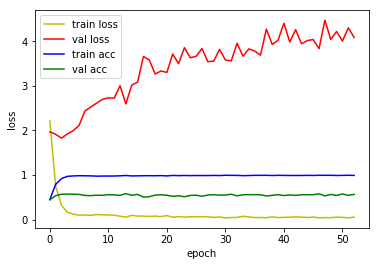

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.9381 - acc: 0.5375
Loss: 1.9381323531656869 Accuracy: 0.53748703

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1211 - acc: 0.4793
Epoch 00001: val_loss improved from inf to 1.82394, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_5_conv_checkpoint/001-1.8239.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 2.1211 - acc: 0.4793 - val_loss: 1.8239 - val_acc: 0.4922
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.7460 - acc: 0.7932
Epoch 00002: val_loss improved from 1.82394 to 1.80033, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_5_conv_checkpoint/002-1.8003.hdf5
36805/36805 [==============================] - 112s 3ms/sample - loss: 0.7462 - acc: 0.7931 - val_loss: 1.8003 - val_acc: 0.5733
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0836 - acc: 0.9812
Epoch 00029: val_loss did not improve from 1.66849
36805/36805 [==============================] - 111s 3ms/sample - loss: 0.0838 - acc: 0.9812 - val_loss: 3.2542 - val_acc: 0.6084
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0544 - acc: 0.9889
Epoch 00030: val_loss did not improve from 1.66849
36805/36805 [==============================] - 111s 3ms/sample - loss: 0.0545 - acc: 0.9889 - val_loss: 3.6090 - val_acc: 0.5737
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0671 - acc: 0.9860
Epoch 00031: val_loss did not improve from 1.66849
36805/36805 [==============================] - 111s 3ms/sample - loss: 0.0671 - acc: 0.9860 - val_loss: 3.3533 - val_acc: 0.6038
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9926
Epoch 00032: val_loss did not improve from 1.66849
36805/36805 [========

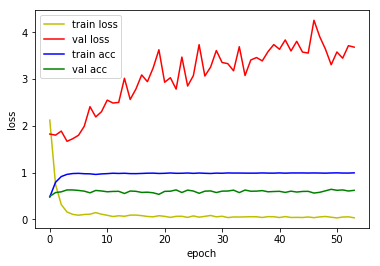

4815/4815 [==============================] - 6s 1ms/sample - loss: 1.9277 - acc: 0.5751
Loss: 1.927673839037292 Accuracy: 0.5750779

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8288 - acc: 0.4989
Epoch 00001: val_loss improved from inf to 1.64076, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_6_conv_checkpoint/001-1.6408.hdf5
36805/36805 [==============================] - 130s 4ms/sample - loss: 1.8289 - acc: 0.4989 - val_loss: 1.6408 - val_acc: 0.5215
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9292 - acc: 0.7335
Epoch 00002: val_loss improved from 1.64076 to 1.41677, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_6_conv_checkpoint/002-1.4168.hdf5
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.9292 - acc: 0.7335 - val_loss: 1.4168 - val_acc: 0.6196
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4

36800/36805 [============================>.] - ETA: 0s - loss: 0.0522 - acc: 0.9870
Epoch 00028: val_loss did not improve from 1.18306
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0523 - acc: 0.9870 - val_loss: 2.0828 - val_acc: 0.6620
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9863
Epoch 00029: val_loss did not improve from 1.18306
36805/36805 [==============================] - 116s 3ms/sample - loss: 0.0566 - acc: 0.9863 - val_loss: 2.4962 - val_acc: 0.6126
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0656 - acc: 0.9845
Epoch 00030: val_loss did not improve from 1.18306
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0656 - acc: 0.9845 - val_loss: 2.1470 - val_acc: 0.6746
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0277 - acc: 0.9951
Epoch 00031: val_loss did not improve from 1.18306
36805/36805 [=====================

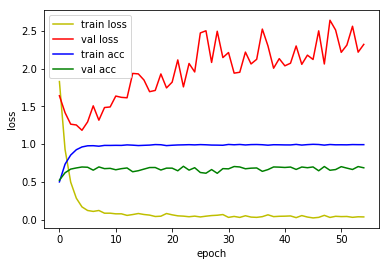

4815/4815 [==============================] - 6s 1ms/sample - loss: 1.3118 - acc: 0.6638
Loss: 1.3117821176970612 Accuracy: 0.6637591

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6733 - acc: 0.5127
Epoch 00001: val_loss improved from inf to 1.42738, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_7_conv_checkpoint/001-1.4274.hdf5
36805/36805 [==============================] - 137s 4ms/sample - loss: 1.6733 - acc: 0.5126 - val_loss: 1.4274 - val_acc: 0.5441
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0146 - acc: 0.7038
Epoch 00002: val_loss improved from 1.42738 to 1.06648, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_7_conv_checkpoint/002-1.0665.hdf5
36805/36805 [==============================] - 120s 3ms/sample - loss: 1.0148 - acc: 0.7037 - val_loss: 1.0665 - val_acc: 0.6995
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.

36800/36805 [============================>.] - ETA: 0s - loss: 0.0796 - acc: 0.9785
Epoch 00028: val_loss did not improve from 0.97005
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0796 - acc: 0.9785 - val_loss: 1.2708 - val_acc: 0.7431
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0310 - acc: 0.9945
Epoch 00029: val_loss did not improve from 0.97005
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0312 - acc: 0.9945 - val_loss: 1.3887 - val_acc: 0.7386
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9916
Epoch 00030: val_loss did not improve from 0.97005
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.0384 - acc: 0.9916 - val_loss: 1.3019 - val_acc: 0.7559
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9922
Epoch 00031: val_loss did not improve from 0.97005
36805/36805 [=====================


1D_CNN_custom_pool_2_BN_7_conv Model


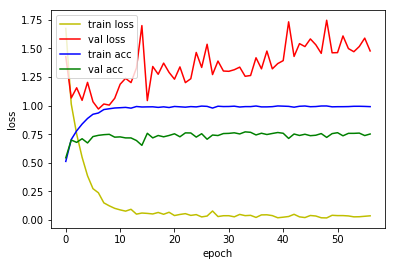

4815/4815 [==============================] - 6s 1ms/sample - loss: 1.0674 - acc: 0.7148
Loss: 1.0673616539775892 Accuracy: 0.7148494

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6864 - acc: 0.4897
Epoch 00001: val_loss improved from inf to 1.46598, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_8_conv_checkpoint/001-1.4660.hdf5
36805/36805 [==============================] - 144s 4ms/sample - loss: 1.6864 - acc: 0.4897 - val_loss: 1.4660 - val_acc: 0.5271
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9985 - acc: 0.7041
Epoch 00002: val_loss improved from 1.46598 to 1.09617, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_8_conv_checkpoint/002-1.0962.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.9986 - acc: 0.7040 - val_loss: 1.0962 - val_acc: 0.6930
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.

Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9918
Epoch 00028: val_loss did not improve from 0.59638
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0402 - acc: 0.9918 - val_loss: 0.7789 - val_acc: 0.8309
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0303 - acc: 0.9948
Epoch 00029: val_loss did not improve from 0.59638
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0303 - acc: 0.9948 - val_loss: 0.7481 - val_acc: 0.8321
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0444 - acc: 0.9899
Epoch 00030: val_loss did not improve from 0.59638
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0445 - acc: 0.9899 - val_loss: 1.1862 - val_acc: 0.7601
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9863
Epoch 00031: val_loss did not improve from 0.59638
36805/36805 [========

Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9980
Epoch 00058: val_loss did not improve from 0.59638
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0130 - acc: 0.9979 - val_loss: 0.8744 - val_acc: 0.8383
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0333 - acc: 0.9911
Epoch 00059: val_loss did not improve from 0.59638
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0333 - acc: 0.9911 - val_loss: 0.7871 - val_acc: 0.8493
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0131 - acc: 0.9978
Epoch 00060: val_loss did not improve from 0.59638
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0131 - acc: 0.9978 - val_loss: 0.7787 - val_acc: 0.8556
Epoch 61/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0137 - acc: 0.9977
Epoch 00061: val_loss did not improve from 0.59638
36805/36805 [========

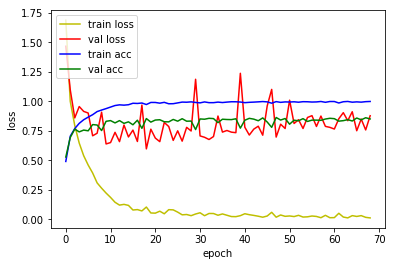

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.7235 - acc: 0.8243
Loss: 0.7234576030559876 Accuracy: 0.82429904

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5629 - acc: 0.5311
Epoch 00001: val_loss improved from inf to 1.28778, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_9_conv_checkpoint/001-1.2878.hdf5
36805/36805 [==============================] - 151s 4ms/sample - loss: 1.5627 - acc: 0.5312 - val_loss: 1.2878 - val_acc: 0.6061
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8659 - acc: 0.7478
Epoch 00002: val_loss improved from 1.28778 to 0.79267, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_9_conv_checkpoint/002-0.7927.hdf5
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.8661 - acc: 0.7478 - val_loss: 0.7927 - val_acc: 0.7731
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 0

36800/36805 [============================>.] - ETA: 0s - loss: 0.0253 - acc: 0.9945
Epoch 00027: val_loss did not improve from 0.43633
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.0253 - acc: 0.9945 - val_loss: 0.4982 - val_acc: 0.8987
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9905
Epoch 00028: val_loss did not improve from 0.43633
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0368 - acc: 0.9905 - val_loss: 0.4819 - val_acc: 0.8933
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0414 - acc: 0.9892
Epoch 00029: val_loss did not improve from 0.43633
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.0417 - acc: 0.9892 - val_loss: 0.5067 - val_acc: 0.9008
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0593 - acc: 0.9827
Epoch 00030: val_loss did not improve from 0.43633
36805/36805 [=====================

36800/36805 [============================>.] - ETA: 0s - loss: 0.0156 - acc: 0.9964
Epoch 00056: val_loss did not improve from 0.42312
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.0158 - acc: 0.9963 - val_loss: 0.6092 - val_acc: 0.8931
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0394 - acc: 0.9883
Epoch 00057: val_loss did not improve from 0.42312
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0394 - acc: 0.9883 - val_loss: 0.5095 - val_acc: 0.9031
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0181 - acc: 0.9953
Epoch 00058: val_loss did not improve from 0.42312
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0182 - acc: 0.9952 - val_loss: 0.5054 - val_acc: 0.9082
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9933
Epoch 00059: val_loss did not improve from 0.42312
36805/36805 [=====================

Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9956
Epoch 00086: val_loss did not improve from 0.42312
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0176 - acc: 0.9956 - val_loss: 0.5674 - val_acc: 0.9045
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.9980
Epoch 00087: val_loss did not improve from 0.42312
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0097 - acc: 0.9980 - val_loss: 0.5935 - val_acc: 0.8984

1D_CNN_custom_pool_2_BN_9_conv Model


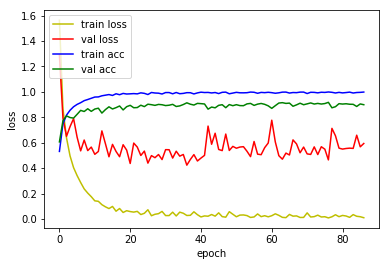

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.4908 - acc: 0.8906
Loss: 0.4907995786189043 Accuracy: 0.8905504

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4859 - acc: 0.5520
Epoch 00001: val_loss improved from inf to 1.40612, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_10_conv_checkpoint/001-1.4061.hdf5
36805/36805 [==============================] - 160s 4ms/sample - loss: 1.4859 - acc: 0.5520 - val_loss: 1.4061 - val_acc: 0.5660
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.7265 - acc: 0.7885
Epoch 00002: val_loss improved from 1.40612 to 0.68406, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_10_conv_checkpoint/002-0.6841.hdf5
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.7267 - acc: 0.7885 - val_loss: 0.6841 - val_acc: 0.7980
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 

36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0548 - acc: 0.9847 - val_loss: 0.2550 - val_acc: 0.9371
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0249 - acc: 0.9940
Epoch 00026: val_loss improved from 0.25504 to 0.22013, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_10_conv_checkpoint/026-0.2201.hdf5
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0249 - acc: 0.9940 - val_loss: 0.2201 - val_acc: 0.9427
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9949
Epoch 00027: val_loss did not improve from 0.22013
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0220 - acc: 0.9949 - val_loss: 0.2408 - val_acc: 0.9390
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0332 - acc: 0.9901
Epoch 00028: val_loss did not improve from 0.22013
36805/36805 [==============================] - 125s 3ms/sample - loss: 0

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0115 - acc: 0.9971
Epoch 00055: val_loss did not improve from 0.22013
36805/36805 [==============================] - 124s 3ms/sample - loss: 0.0116 - acc: 0.9971 - val_loss: 0.2486 - val_acc: 0.9448
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0227 - acc: 0.9930
Epoch 00056: val_loss did not improve from 0.22013
36805/36805 [==============================] - 124s 3ms/sample - loss: 0.0227 - acc: 0.9930 - val_loss: 0.2504 - val_acc: 0.9495
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9977
Epoch 00057: val_loss improved from 0.22013 to 0.21699, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_10_conv_checkpoint/057-0.2170.hdf5
36805/36805 [==============================] - 124s 3ms/sample - loss: 0.0087 - acc: 0.9977 - val_loss: 0.2170 - val_acc: 0.9522
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - lo

36800/36805 [============================>.] - ETA: 0s - loss: 0.0163 - acc: 0.9947
Epoch 00084: val_loss did not improve from 0.21699
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0163 - acc: 0.9947 - val_loss: 0.2564 - val_acc: 0.9481
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0028 - acc: 0.9994
Epoch 00085: val_loss did not improve from 0.21699
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0028 - acc: 0.9994 - val_loss: 0.2539 - val_acc: 0.9453
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0040 - acc: 0.9990
Epoch 00086: val_loss did not improve from 0.21699
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0040 - acc: 0.9990 - val_loss: 0.3235 - val_acc: 0.9369
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0163 - acc: 0.9950
Epoch 00087: val_loss did not improve from 0.21699
36805/36805 [=====================

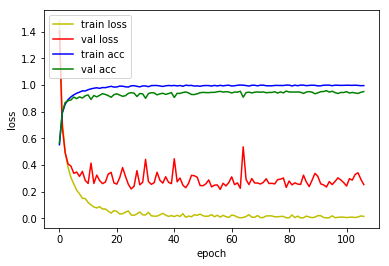

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.2771 - acc: 0.9360
Loss: 0.27709398446483724 Accuracy: 0.93603325

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3457 - acc: 0.5951
Epoch 00001: val_loss improved from inf to 0.90779, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_11_conv_checkpoint/001-0.9078.hdf5
36805/36805 [==============================] - 171s 5ms/sample - loss: 1.3456 - acc: 0.5951 - val_loss: 0.9078 - val_acc: 0.7228
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.5482 - acc: 0.8405
Epoch 00002: val_loss improved from 0.90779 to 0.48592, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_11_conv_checkpoint/002-0.4859.hdf5
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.5483 - acc: 0.8405 - val_loss: 0.4859 - val_acc: 0.8551
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss

36800/36805 [============================>.] - ETA: 0s - loss: 0.0306 - acc: 0.9915
Epoch 00026: val_loss did not improve from 0.17074
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0306 - acc: 0.9914 - val_loss: 0.1853 - val_acc: 0.9495
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0248 - acc: 0.9933
Epoch 00027: val_loss did not improve from 0.17074
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0248 - acc: 0.9933 - val_loss: 0.1870 - val_acc: 0.9539
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9954
Epoch 00028: val_loss did not improve from 0.17074
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0182 - acc: 0.9953 - val_loss: 0.2264 - val_acc: 0.9481
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0373 - acc: 0.9894
Epoch 00029: val_loss did not improve from 0.17074
36805/36805 [=====================

36800/36805 [============================>.] - ETA: 0s - loss: 0.0195 - acc: 0.9944
Epoch 00054: val_loss did not improve from 0.16361
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0195 - acc: 0.9944 - val_loss: 0.1838 - val_acc: 0.9583
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.9989
Epoch 00055: val_loss did not improve from 0.16361
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0053 - acc: 0.9989 - val_loss: 0.1720 - val_acc: 0.9578
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9989
Epoch 00056: val_loss did not improve from 0.16361
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0050 - acc: 0.9989 - val_loss: 0.2055 - val_acc: 0.9562
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0173 - acc: 0.9945
Epoch 00057: val_loss did not improve from 0.16361
36805/36805 [=====================

Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 0.9997
Epoch 00083: val_loss did not improve from 0.15136
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0021 - acc: 0.9997 - val_loss: 0.2188 - val_acc: 0.9539
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9986
Epoch 00084: val_loss did not improve from 0.15136
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0057 - acc: 0.9986 - val_loss: 0.2443 - val_acc: 0.9483
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9980
Epoch 00085: val_loss did not improve from 0.15136
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0073 - acc: 0.9980 - val_loss: 0.1970 - val_acc: 0.9644
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0029 - acc: 0.9995
Epoch 00086: val_loss did not improve from 0.15136
36805/36805 [========

36800/36805 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9998
Epoch 00112: val_loss improved from 0.14924 to 0.14904, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_11_conv_checkpoint/112-0.1490.hdf5
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0015 - acc: 0.9998 - val_loss: 0.1490 - val_acc: 0.9667
Epoch 113/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 0.9998
Epoch 00113: val_loss did not improve from 0.14904
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0013 - acc: 0.9998 - val_loss: 0.1687 - val_acc: 0.9655
Epoch 114/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9971
Epoch 00114: val_loss did not improve from 0.14904
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0093 - acc: 0.9971 - val_loss: 0.1662 - val_acc: 0.9641
Epoch 115/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0016

36800/36805 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9987
Epoch 00141: val_loss did not improve from 0.14904
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0042 - acc: 0.9987 - val_loss: 0.1752 - val_acc: 0.9634
Epoch 142/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9996
Epoch 00142: val_loss did not improve from 0.14904
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0015 - acc: 0.9996 - val_loss: 0.1716 - val_acc: 0.9667
Epoch 143/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 0.9985
Epoch 00143: val_loss did not improve from 0.14904
36805/36805 [==============================] - 126s 3ms/sample - loss: 0.0049 - acc: 0.9985 - val_loss: 0.2360 - val_acc: 0.9581
Epoch 144/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9974
Epoch 00144: val_loss did not improve from 0.14904
36805/36805 [==================

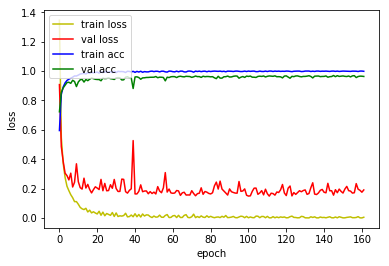

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1884 - acc: 0.9578
Loss: 0.18837949702224133 Accuracy: 0.9578401

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1443 - acc: 0.6513
Epoch 00001: val_loss improved from inf to 0.72080, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_12_conv_checkpoint/001-0.7208.hdf5
36805/36805 [==============================] - 176s 5ms/sample - loss: 1.1442 - acc: 0.6513 - val_loss: 0.7208 - val_acc: 0.7815
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4206 - acc: 0.8742
Epoch 00002: val_loss improved from 0.72080 to 0.37150, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_12_conv_checkpoint/002-0.3715.hdf5
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.4206 - acc: 0.8743 - val_loss: 0.3715 - val_acc: 0.8898
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss:

Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9949
Epoch 00028: val_loss did not improve from 0.15420
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0175 - acc: 0.9949 - val_loss: 0.2169 - val_acc: 0.9455
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0205 - acc: 0.9939
Epoch 00029: val_loss did not improve from 0.15420
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0205 - acc: 0.9939 - val_loss: 0.2511 - val_acc: 0.9357
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9945
Epoch 00030: val_loss did not improve from 0.15420
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0189 - acc: 0.9945 - val_loss: 0.3031 - val_acc: 0.9334
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.9967
Epoch 00031: val_loss did not improve from 0.15420
36805/36805 [========

Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9978
Epoch 00057: val_loss did not improve from 0.14199
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0075 - acc: 0.9978 - val_loss: 0.2187 - val_acc: 0.9499
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 0.9987
Epoch 00058: val_loss did not improve from 0.14199
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0048 - acc: 0.9987 - val_loss: 0.1605 - val_acc: 0.9639
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9983
Epoch 00059: val_loss did not improve from 0.14199
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0074 - acc: 0.9982 - val_loss: 0.2587 - val_acc: 0.9441
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9939
Epoch 00060: val_loss did not improve from 0.14199
36805/36805 [========

36800/36805 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9945
Epoch 00086: val_loss did not improve from 0.12419
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0167 - acc: 0.9945 - val_loss: 0.1634 - val_acc: 0.9672
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0049 - acc: 0.9986
Epoch 00087: val_loss did not improve from 0.12419
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0049 - acc: 0.9986 - val_loss: 0.1374 - val_acc: 0.9720
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9998
Epoch 00088: val_loss did not improve from 0.12419
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.0015 - acc: 0.9998 - val_loss: 0.1454 - val_acc: 0.9725
Epoch 89/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 0.9998
Epoch 00089: val_loss did not improve from 0.12419
36805/36805 [=====================

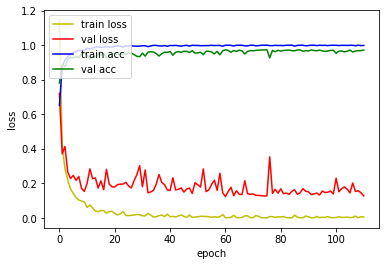

4815/4815 [==============================] - 7s 2ms/sample - loss: 0.1705 - acc: 0.9583
Loss: 0.17051000813852032 Accuracy: 0.95825547

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9678 - acc: 0.6970
Epoch 00001: val_loss improved from inf to 0.68262, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_13_conv_checkpoint/001-0.6826.hdf5
36805/36805 [==============================] - 176s 5ms/sample - loss: 0.9677 - acc: 0.6971 - val_loss: 0.6826 - val_acc: 0.7808
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3561 - acc: 0.8877
Epoch 00002: val_loss improved from 0.68262 to 0.27574, saving model to model/checkpoint/1D_CNN_custom_pool_2_BN_13_conv_checkpoint/002-0.2757.hdf5
36805/36805 [==============================] - 124s 3ms/sample - loss: 0.3561 - acc: 0.8877 - val_loss: 0.2757 - val_acc: 0.9168
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss

Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.9976
Epoch 00027: val_loss did not improve from 0.15363
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0105 - acc: 0.9976 - val_loss: 0.1725 - val_acc: 0.9539
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9951
Epoch 00028: val_loss did not improve from 0.15363
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0161 - acc: 0.9951 - val_loss: 0.2132 - val_acc: 0.9506
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0259 - acc: 0.9920
Epoch 00029: val_loss did not improve from 0.15363
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0259 - acc: 0.9920 - val_loss: 0.1545 - val_acc: 0.9588
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0110 - acc: 0.9973
Epoch 00030: val_loss did not improve from 0.15363
36805/36805 [========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0086 - acc: 0.9974
Epoch 00056: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0086 - acc: 0.9974 - val_loss: 0.1490 - val_acc: 0.9655
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 0.9990
Epoch 00057: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0036 - acc: 0.9990 - val_loss: 0.1372 - val_acc: 0.9651
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9977
Epoch 00058: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0076 - acc: 0.9977 - val_loss: 0.3164 - val_acc: 0.9415
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9952
Epoch 00059: val_loss did not improve from 0.11908
36805/36805 [========

Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 9.8139e-04 - acc: 0.9998
Epoch 00086: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0011 - acc: 0.9998 - val_loss: 0.1316 - val_acc: 0.9718
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9968
Epoch 00087: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0107 - acc: 0.9968 - val_loss: 0.1364 - val_acc: 0.9704
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 0.9992
Epoch 00088: val_loss did not improve from 0.11908
36805/36805 [==============================] - 125s 3ms/sample - loss: 0.0037 - acc: 0.9991 - val_loss: 0.1347 - val_acc: 0.9723
Epoch 89/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.9980
Epoch 00089: val_loss did not improve from 0.11908
36805/36805 [====

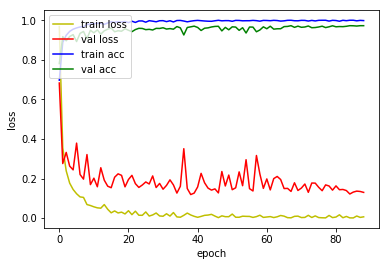

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1679 - acc: 0.9578
Loss: 0.16788074450600246 Accuracy: 0.9578401



In [10]:
for i in range(3, 14):
    base = '1D_CNN_custom_pool_2_BN'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_BN_2(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)
    
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_pool_2_BN'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 14):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_104 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_105 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 80

4815/4815 [==============================] - 8s 2ms/sample - loss: 1.9277 - acc: 0.5751
Loss: 1.927673839037292 Accuracy: 0.5750779

1D_CNN_custom_pool_2_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_103 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_119 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_103 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_120 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_104 (Activation)  (None, 16

4815/4815 [==============================] - 9s 2ms/sample - loss: 1.0674 - acc: 0.7148
Loss: 1.0673616539775892 Accuracy: 0.7148494

1D_CNN_custom_pool_2_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_134 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_116 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_135 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_117 (Activation)  (None, 1

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.4908 - acc: 0.8906
Loss: 0.4907995786189043 Accuracy: 0.8905504

1D_CNN_custom_pool_2_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_153 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_154 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_134 (Activation)  (None, 

4815/4815 [==============================] - 10s 2ms/sample - loss: 0.1884 - acc: 0.9578
Loss: 0.18837949702224133 Accuracy: 0.9578401

1D_CNN_custom_pool_2_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_176 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_177 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_155 (Activation)  (None

4815/4815 [==============================] - 10s 2ms/sample - loss: 0.1679 - acc: 0.9578
Loss: 0.16788074450600246 Accuracy: 0.9578401


In [12]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)
# base = '1D_CNN_custom_BN_2'

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_104 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_105 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 80

4815/4815 [==============================] - 10s 2ms/sample - loss: 4.0363 - acc: 0.5772
Loss: 4.036344213426299 Accuracy: 0.5771547

1D_CNN_custom_pool_2_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_103 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_119 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_103 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_104 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_120 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_104 (Activation)  (None, 1

4815/4815 [==============================] - 11s 2ms/sample - loss: 1.6086 - acc: 0.7248
Loss: 1.6086186961097757 Accuracy: 0.7248183

1D_CNN_custom_pool_2_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_116 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_134 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_116 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_135 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_117 (Activation)  (None, 

4815/4815 [==============================] - 11s 2ms/sample - loss: 0.7281 - acc: 0.8741
Loss: 0.728079847024361 Accuracy: 0.8741433

1D_CNN_custom_pool_2_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_153 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_154 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_134 (Activation)  (None, 

4815/4815 [==============================] - 12s 2ms/sample - loss: 0.1994 - acc: 0.9601
Loss: 0.19936912025978765 Accuracy: 0.9601246

1D_CNN_custom_pool_2_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_176 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_177 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_155 (Activation)  (None

4815/4815 [==============================] - 12s 3ms/sample - loss: 0.1590 - acc: 0.9643
Loss: 0.15897224372223084 Accuracy: 0.9642783
